# Decision Tree

#### Dataset contains:

buying: Buying price

maint: Maintenance Cost

doors: Number of Doors

persons: Number of Person

lug_boot: size of luggage boot

safety: safety of the car

class: unacc, acc, vgood, good

Accuracy is 81%.

In [1]:
# Importing all libraries
    
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('car_evaluation.csv', header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


#### Feature Engineering

In [3]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
df = encoder.fit_transform(df)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


In [4]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)

In [5]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
660,1,1,1,1,1,1
1447,2,2,2,1,2,2
829,1,3,3,2,3,2
1336,2,4,2,1,1,2
581,1,2,2,1,1,3


In [6]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=10)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [7]:
y_pred_gini = clf_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8109


In [8]:
y_pred_train_gini = clf_gini.predict(X_train)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8029


In [9]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8029
Test set score: 0.8109


[Text(0.4, 0.875, 'X[5] <= 1.5\ngini = 0.466\nsamples = 1157\nvalue = [259, 52, 802, 44]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 382\nvalue = [0, 0, 382, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\ngini = 0.587\nsamples = 775\nvalue = [259, 52, 420, 44]'),
 Text(0.4, 0.375, 'X[0] <= 3.5\ngini = 0.635\nsamples = 528\nvalue = [259, 52, 173, 44]'),
 Text(0.2, 0.125, 'gini = 0.632\nsamples = 399\nvalue = [215, 52, 88, 44]'),
 Text(0.6, 0.125, 'gini = 0.449\nsamples = 129\nvalue = [44, 0, 85, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 247\nvalue = [0, 0, 247, 0]')]

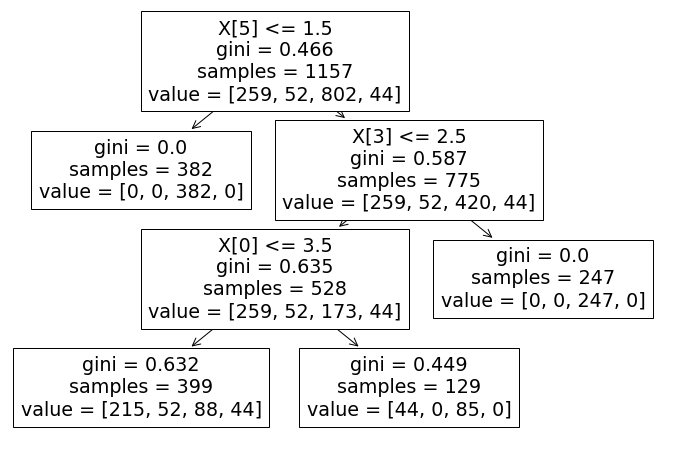

In [10]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [11]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8109


In [12]:
y_pred_train_en = clf_en.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8029


In [13]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8029
Test set score: 0.8109


[Text(0.4, 0.875, 'X[5] <= 1.5\nentropy = 1.23\nsamples = 1157\nvalue = [259, 52, 802, 44]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 382\nvalue = [0, 0, 382, 0]'),
 Text(0.6, 0.625, 'X[3] <= 2.5\nentropy = 1.504\nsamples = 775\nvalue = [259, 52, 420, 44]'),
 Text(0.4, 0.375, 'X[0] <= 3.5\nentropy = 1.66\nsamples = 528\nvalue = [259, 52, 173, 44]'),
 Text(0.2, 0.125, 'entropy = 1.696\nsamples = 399\nvalue = [215, 52, 88, 44]'),
 Text(0.6, 0.125, 'entropy = 0.926\nsamples = 129\nvalue = [44, 0, 85, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 247\nvalue = [0, 0, 247, 0]')]

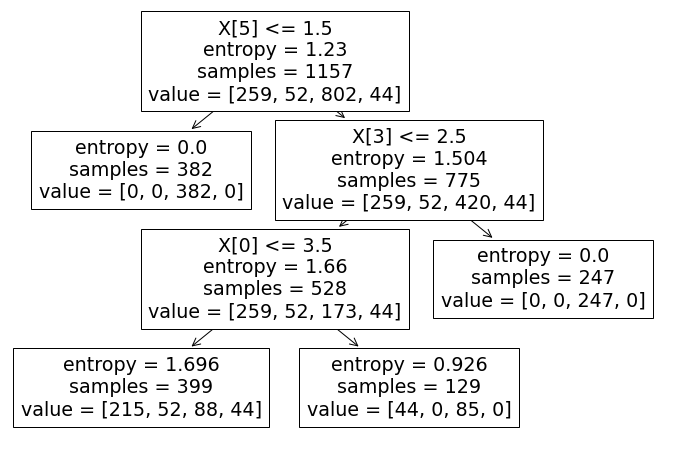

In [14]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [15]:
cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 97   0  28   0]
 [ 17   0   0   0]
 [ 42   0 366   0]
 [ 21   0   0   0]]


In [16]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.55      0.78      0.64       125
        good       0.00      0.00      0.00        17
       unacc       0.93      0.90      0.91       408
       vgood       0.00      0.00      0.00        21

    accuracy                           0.81       571
   macro avg       0.37      0.42      0.39       571
weighted avg       0.78      0.81      0.79       571



C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dhruv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
